In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress
import seaborn as sns

Наблюдение 1: x=0, y=26.42165573881374
Наблюдение 2: x=1, y=-3.110796386149218
Наблюдение 3: x=2, y=0.16880838040636093
Наблюдение 4: x=3, y=6.31405674657344
Наблюдение 5: x=4, y=21.100919016684088
Наблюдение 6: x=5, y=44.40509670559156
Наблюдение 7: x=6, y=38.14212497119793
Наблюдение 8: x=7, y=35.33593349303024
Наблюдение 9: x=8, y=39.85995637288431
Наблюдение 10: x=9, y=63.38560295736623


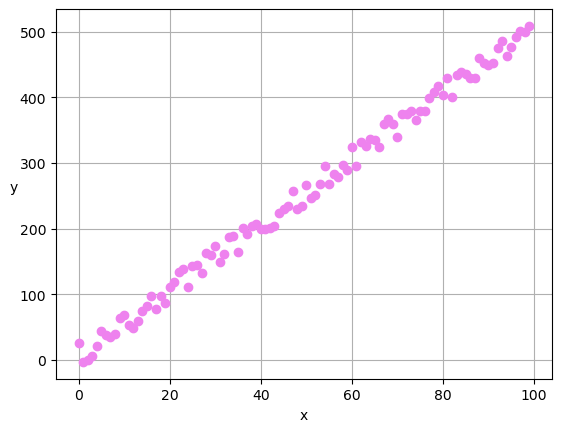

In [37]:
x  = np.arange(100)
y = 5 * x + 7 + np.random.uniform(-20, 20, size=100)
for n in range(10):
    print(f"Наблюдение {n+1}: x={x[n]}, y={y[n]}")
plt.plot(x,y,'o', color = 'violet')
plt.grid(True)
plt.ylabel('y',rotation = 0)
plt.xlabel('x')
plt.show()

In [38]:
def f(w, b, x, y):
    predict = w * x + b
    e = predict - y
    loss_fun= np.sum(e**2) / (2 * len(x))
    return loss_fun

def dw(w, b, x, y):
    predict = w * x + b
    e = predict - y
    derivative_w = np.sum(e * x) / len(x)
    return derivative_w

def db(w, b, x, y):
    predict = w * x + b
    e = predict - y
    derivative_b = np.sum(e) / len(x)
    return derivative_b

In [39]:
lam = 0.0001
x_0 = np.array([0.0, 0.0]) 
i = 0

while True:
    x_1 = x_0.copy()
    x_1[0] -= lam * dw(x_0[0], x_0[1], x, y)
    x_1[1] -= lam * db(x_0[0], x_0[1], x, y)
    if np.linalg.norm(x_1 - x_0) <= 0.001 or i >= 100000:
        break
    i += 1
    x_0 = x_1

In [40]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
def F(x):
    return slope * x + intercept
print(slope)
print(intercept)

5.042189604203474
4.660458615740396


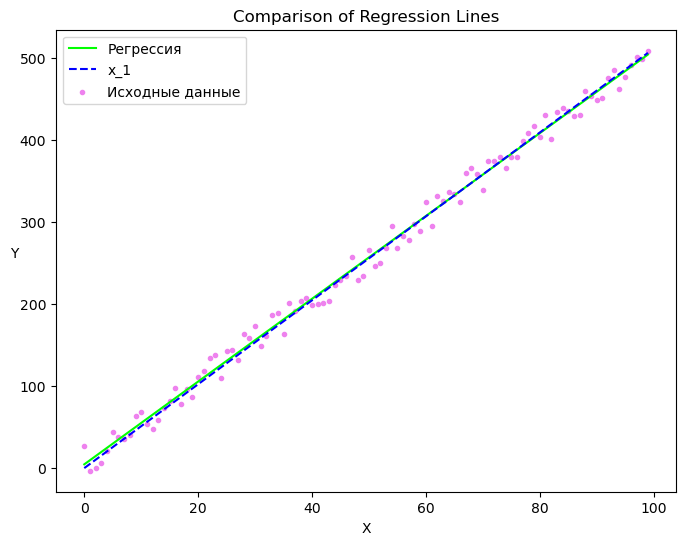

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, F(x), color='lime', label='Регрессия')
ax.plot(x, x_1[0]*x + x_1[1], color='b', linestyle='--', label='x_1')
ax.scatter(x, y, marker='.', color='violet', label='Исходные данные')
ax.set_xlabel('X')
ax.set_ylabel('Y', rotation = 0)
ax.legend(loc='best')
ax.set_title('Comparison of Regression Lines')

plt.show()